In [1]:
import pandas as pd
import numpy as np

# Create the dataset
data = {
    'Rollno': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Name': ['Sudin', 'Shaima', 'Raina', 'Paul', 'Rahul', 'Gopal', 'Yatin', 'Jim', 'Nima'],
    'Age': [44, 46, 27, 38, 46, None, 59, 36, 45],
    'Marks': [47, 86, 45, None, 45, 67, 45, 34, 32],
    'Class': ['FY', 'SY', 'TY', 'SY', 'FY', 'TY', 'FY', 'FY', 'TY']
}

# Create DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv('student_data.csv', index=False)
print("CSV file created successfully.\n")

# Read from CSV
student_df = pd.read_csv('student_data.csv')
print("Original Data:")
print(student_df)
print("\nMissing Values:")
print(student_df.isnull().sum())

# Data Preprocessing
# 1. Handle missing values in Age (fill with median)
age_median = student_df['Age'].median()
student_df['Age'].fillna(age_median, inplace=True)

# 2. Handle missing values in Marks (fill with class-wise mean)
student_df['Marks'] = student_df.groupby('Class')['Marks'].transform(
    lambda x: x.fillna(x.mean()))

# 3. Handle outliers in Marks using IQR method
Q1 = student_df['Marks'].quantile(0.25)
Q3 = student_df['Marks'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
student_df['Marks'] = np.where(student_df['Marks'] > upper_bound, upper_bound,
                              np.where(student_df['Marks'] < lower_bound, lower_bound, 
                                      student_df['Marks']))

print("\nProcessed Data:")
print(student_df)
print("\nMissing Values After Processing:")
print(student_df.isnull().sum())

CSV file created successfully.

Original Data:
   Rollno    Name   Age  Marks Class
0       1   Sudin  44.0   47.0    FY
1       2  Shaima  46.0   86.0    SY
2       3   Raina  27.0   45.0    TY
3       4    Paul  38.0    NaN    SY
4       5   Rahul  46.0   45.0    FY
5       6   Gopal   NaN   67.0    TY
6       7   Yatin  59.0   45.0    FY
7       8     Jim  36.0   34.0    FY
8       9    Nima  45.0   32.0    TY

Missing Values:
Rollno    0
Name      0
Age       1
Marks     1
Class     0
dtype: int64

Processed Data:
   Rollno    Name   Age  Marks Class
0       1   Sudin  44.0   47.0    FY
1       2  Shaima  46.0   86.0    SY
2       3   Raina  27.0   45.0    TY
3       4    Paul  38.0   86.0    SY
4       5   Rahul  46.0   45.0    FY
5       6   Gopal  44.5   67.0    TY
6       7   Yatin  59.0   45.0    FY
7       8     Jim  36.0   34.0    FY
8       9    Nima  45.0   32.0    TY

Missing Values After Processing:
Rollno    0
Name      0
Age       0
Marks     0
Class     0
dtype: int64

C:\Users\rjcan\AppData\Local\Temp\ipykernel_4644\4196629829.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_df['Age'].fillna(age_median, inplace=True)


Linear Regression Results:
Regression Equation: petal width = 0.4158 * petal length + -0.3631
Mean Squared Error: 0.0421
Root Mean Squared Error: 0.2051
R-squared: 0.9271


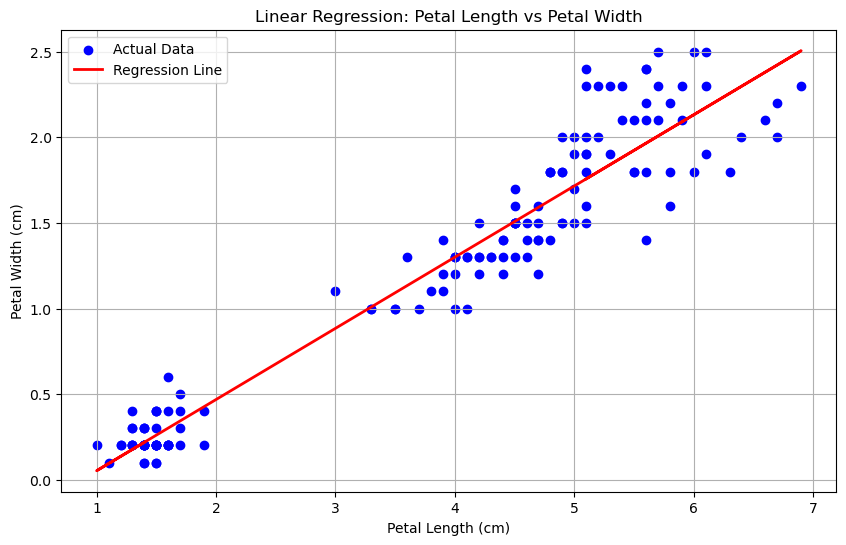


Predictions for New Petal Lengths:
Length: 1.5 cm => Predicted Width: 0.26 cm
Length: 2.0 cm => Predicted Width: 0.47 cm
Length: 2.5 cm => Predicted Width: 0.68 cm


C:\Users\rjcan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Prepare data
X = iris_df[['petal length (cm)']]  # Independent variable
y = iris_df['petal width (cm)']     # Dependent variable

# Create and fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y, y_pred)

# Print results
print("Linear Regression Results:")
print(f"Regression Equation: petal width = {model.coef_[0]:.4f} * petal length + {model.intercept_:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Linear Regression: Petal Length vs Petal Width')
plt.legend()
plt.grid(True)
plt.show()

# Predict for new values
new_lengths = np.array([[1.5], [2.0], [2.5]]).reshape(-1, 1)
predicted_widths = model.predict(new_lengths)
print("\nPredictions for New Petal Lengths:")
for length, width in zip(new_lengths, predicted_widths):
    print(f"Length: {length[0]:.1f} cm => Predicted Width: {width:.2f} cm")
    